In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [101]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df = pd.concat([train_df, test_df], axis=0)

In [102]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [104]:
df.MSSubClass.value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

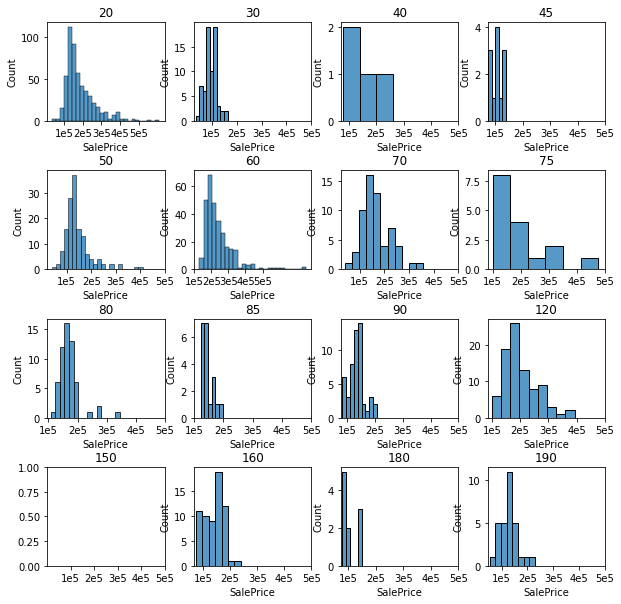

<Figure size 432x288 with 0 Axes>

In [105]:
fig = plt.figure(figsize=(10, 10))
temp_train_df = df.head(1460)
types = sorted(df.MSSubClass.unique())

for i in range(16):
    plt.subplot(4, 4, i+1)
    subclassnum = types[i]
    sns.histplot(x='SalePrice', data=temp_train_df[temp_train_df.MSSubClass == subclassnum])
    plt.title(subclassnum)
    plt.xticks(ticks=(100000, 200000, 300000, 400000, 500000), labels=('1e5', '2e5', '3e5', '4e5', '5e5'))

plt.subplots_adjust(hspace=0.5, wspace=0.25)
plt.show()
plt.clf()

current idea - group by time period/avg selling price

expensive 20, 50, 60, 120, 150

mid 70, 75, 80, 160

cheap 30, 40, 45, 85, 90, 180, 190

maybe need more categories??

ordinal encoder or apply lambda or map

In [106]:
df.MSZoning.fillna(df.MSZoning.mode()[0], inplace=True)
df.MSZoning.value_counts()
# unsure how to turn this into some useful feature 

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

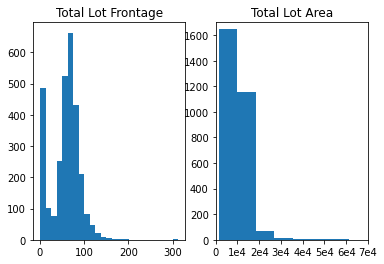

<Figure size 432x288 with 0 Axes>

In [130]:
df.LotFrontage.fillna(0, inplace=True)
df.LotArea.fillna(0, inplace=True)

plt.subplot(1, 2, 1)
plt.hist(df['LotFrontage'], bins=25)
plt.title('Total Lot Frontage')
plt.subplot(1, 2, 2)
plt.hist(df['LotArea'], bins=25)
plt.title('Total Lot Area')
plt.xticks((0, 10000, 20000, 30000, 40000, 50000, 60000, 70000), ('0', '1e4', '2e4', '3e4', '4e4', '5e4', '6e4', '7e4'))
plt.axis([0, 70000, 0, 1700])

plt.show()
plt.clf()

Some big outliers for that ^ but generally larger area = more money, so probably useable with some finetuning

Wood deck area: 1396
Open porch area: 1621
Enclosed porch area: 459
3 Season porch area: 37
Screen porch area: 256


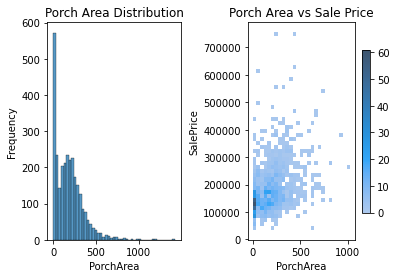

<Figure size 432x288 with 0 Axes>

In [ ]:
# assuming 0 = no porch of that type
print("Wood deck area:", (df['WoodDeckSF'] != 0).sum())
print("Open porch area:", (df['OpenPorchSF'] != 0).sum())
print("Enclosed porch area:", (df['EnclosedPorch'] != 0).sum())
print("3 Season porch area:",  (df['3SsnPorch'] != 0).sum())
print("Screen porch area:", (df['ScreenPorch'] != 0).sum())

df['PorchArea'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
# print(df.PorchArea)

ax = plt.subplot(1, 2, 1)
sns.histplot(df.PorchArea)
plt.ylabel('Frequency')
plt.title("Porch Area Distribution")
ax2 = plt.subplot(1, 2, 2)
sns.histplot(x='PorchArea', y='SalePrice', data=df.head(1460), cbar=True, cbar_kws=dict(shrink=.75))
plt.subplots_adjust(wspace=0.5)
plt.title('Porch Area vs Sale Price')
plt.show()
plt.clf()

There seems to be a positive correlation between cumulative porch area and sale price of the houses, so it is potentially a workable feature. 

Might want to weight the different types of porches - some might be more expensive, need research

In [ ]:
print("Different pool area values")
print(sorted(df.PoolArea.unique()))
print((df['PoolArea'] == 0).sum())

Different pool area values
[0, 144, 228, 368, 444, 480, 512, 519, 555, 561, 576, 648, 738, 800]
2906


There are very few houses (13) in the dataset at all that have a pool. 

Could either make a hasPool feature or ignore completely (considering too little data to fit useful information, would overfit)

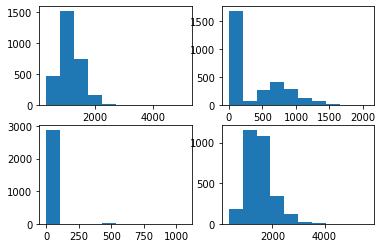

<Figure size 432x288 with 0 Axes>

In [138]:
plt.subplot(2, 2, 1)
plt.hist(df['1stFlrSF'])
plt.subplot(2, 2, 2)
plt.hist(df['2ndFlrSF'])
plt.subplot(2, 2, 3)
plt.hist(df['LowQualFinSF'])
plt.subplot(2, 2, 4)
plt.hist(df['GrLivArea'])
plt.show()
plt.clf()

df[['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']].head()
# 1stFlrSF and 2ndFlrSF just seem to add up to GrLivArea - only use GrLivArea
# lower quality area counts less 
df['LivingArea'] = df['GrLivArea'] + 0.25*df['LowQualFinSF']

In [140]:
df[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']].head()
df['TotAreasAbvGrd'] = df['FullBath'] + 0.5*df['HalfBath'] + df['KitchenAbvGr'] + df['TotRmsAbvGrd']

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd
0,1.0,0.0,2,1,3,1,8
1,0.0,1.0,2,0,3,1,6
2,1.0,0.0,2,1,3,1,6
3,1.0,0.0,1,0,3,1,7
4,1.0,0.0,2,1,4,1,9


Idea for quals (like KitchenQual)
- transform grades into 1-5
- avg each of the qual categories to get 'grade' category